# EDA of Netflix Titles Using IMDB Ratings

In this project i merged 3 datasets to identify the most popular movies and tv shows in Netflix according to IMDb ratings, to answer the following questions using data exploratory analysis:

1) Which countries have the greatest amount of top rated Movies and TV Shows?          
2) Which genre of the best rated Movies and TV Shows?  
3) What the top 10 most popular Movies and TV Shows?  
4) What the top 3 most popular Movies and TV Shows per year of release?

Datasets:
- Movies and tv shows added on Netflix until the beginning of 2020
(it can be found in kaggle - https://www.kaggle.com/shivamb/netflix-shows)  
- IMDb rating and votes information for movies and tv shows   
(it can be found in  - https://www.imdb.com/interfaces/)  

### Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### Input variables

In [2]:
file1 = 'netflix_titles.csv'
file2 = 'imdb_basics.tsv'
file3 = 'imdb_ratings.tsv'

### Setting display options

In [3]:
pd.options.display.max_rows = 30
## Enable inline plotting for graphics
%matplotlib inline
## Set default figure size to be larger 
## this may only work in matplotlib 2.0+!
matplotlib.rcParams['figure.figsize'] = [16.0,8.0]

### Importing Netflix dataset

In [4]:
df_netflix = pd.read_csv(os.path.join('Datasets', file1)) 

In [5]:
print(df_netflix.shape)
df_netflix.head()

(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Variables description:  
* show_id - unique ID for every Movie / Tv Show  
* type - identifier for Movie or TV Show  
* title - Movie / Tv Show title  
* director - movie / tv show director  
* cast - actors involved in the movie / show  
* country - country where the movie / show was produced  
* date_added - date it was added on Netflix  
* release_year - actual release year of the move / show  
* rating - movie / show classification  
* duration - total duration in minutes or number of seasons  
* listed_in - genere  
* description - summary description  

Checking all existing contents types 

In [6]:
df_netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Checking types

In [7]:
df_netflix.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Changing the format of'date_added' field for manipulations

In [8]:
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])

Checking if there are duplicates based on the 'title', 'country', 'type' and 'release_year' variables

In [9]:
check = df_netflix.groupby(['title', 'country', 'type', 'release_year'])["show_id"].count().sort_values(ascending=False)
check

title               country                        type     release_year
Kakegurui           Japan                          TV Show  2019            2
Sarkar              India                          Movie    2018            2
반드시 잡는다             South Korea                    Movie    2017            1
Haters Back Off     United States                  TV Show  2017            1
Harry and Snowman   United States                  Movie    2015            1
                                                                           ..
Revolting Rhymes    United Kingdom                 TV Show  2017            1
Revolutionary Road  United States, United Kingdom  Movie    2008            1
Rezeta              Mexico                         Movie    2012            1
Rhythm + Flow       United States                  TV Show  2019            1
#Roxy               Canada                         Movie    2018            1
Name: show_id, Length: 5756, dtype: int64

In [10]:
df_netflix.loc[df_netflix['title']=='Sarkar']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2123,81075235,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,2019-03-02,2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...
2124,81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,2019-03-02,2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...


Let`s remove these duplicates

In [11]:
print(df_netflix.shape)
df_netflix = df_netflix.drop_duplicates(subset=['title', 'country', 'type', 'release_year'])
print(df_netflix.shape)

(6234, 12)
(6232, 12)


Checking nulls

In [12]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        1968
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

From the above output we see that we have missing values for variables director, cast, country, data_added and rating.  
For data_added and rating variables i will fill in with mode.  
For director, cast and country variables, i will fill with 'Unknown'

In [13]:
df_netflix['rating'].fillna(df_netflix['rating'].mode()[0], inplace=True)
df_netflix['date_added'].fillna(df_netflix['date_added'].mode()[0], inplace=True)
df_netflix['director'].fillna('Unknown', inplace=True)
df_netflix['cast'].fillna('Unknown', inplace=True)
df_netflix['country'].fillna('Unknown', inplace=True)

In [14]:
df_netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Before merge with IMDb datsets, let's investigate a little bit about Netflix dataset

### What is the amount of Netflix title per type? 

Text(0.5, 1.0, 'Amount of Netflix title per type (%)')

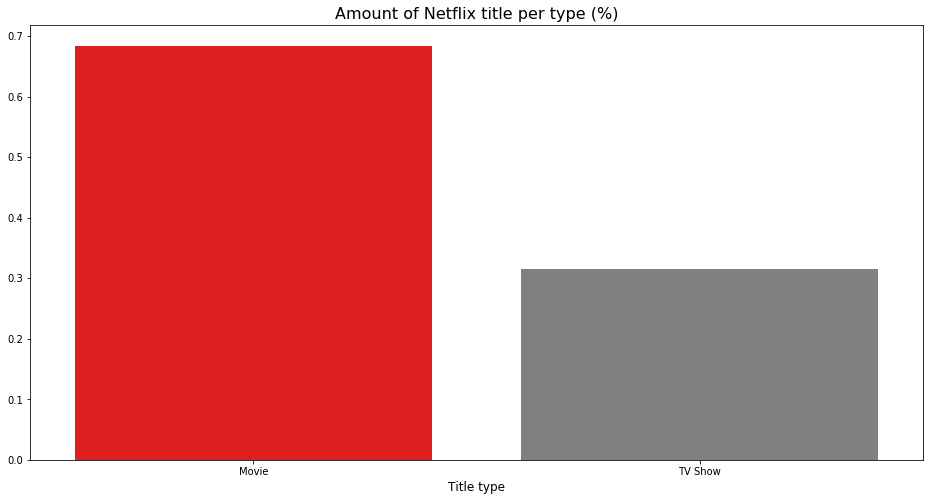

In [15]:
df_netflix_amount = df_netflix.groupby(['type'], as_index=False)['show_id'].count() 
df_netflix_amount.columns = ['type', 'count']
df_netflix_amount['count'] = df_netflix_amount['count'] / df_netflix['show_id'].count()

sns.barplot(x='type', y='count', data = df_netflix_amount, palette=['red', 'grey'])
plt.xlabel('Title type', fontsize='12')
plt.ylabel('', fontsize='12')
plt.title('Amount of Netflix title per type (%)', fontsize='16')

68% of Netflix dataset titles are Movies and 32% are TV Shows 

### In recent years, Netflix has focusing most on Movies or TV shows? 

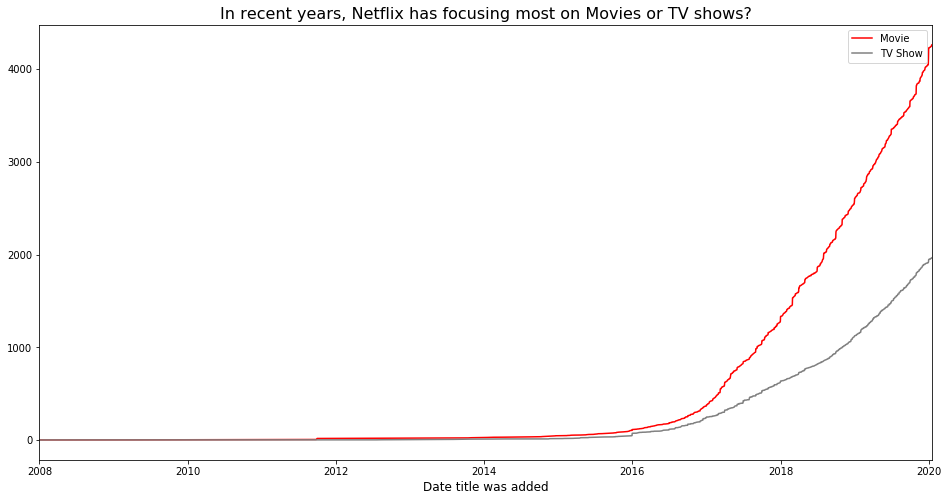

In [16]:
df_added = df_netflix.groupby(['date_added', 'type'], as_index=False)['show_id'].count().sort_values(by='date_added')
df_added = df_added.pivot(index='date_added', columns='type' ,values="show_id").fillna(0)
df_added = df_added.cumsum()

fig = plt.figure(1)
plt.title('In recent years, Netflix has focusing most on Movies or TV shows?', fontsize='16')
plt.plot(df_added['Movie'], color='red', label='Movie')
plt.plot(df_added['TV Show'], color='grey', label='TV Show')
plt.legend(loc='best')
plt.xlim(df_added.index[0], df_added.index[-1])
plt.xlabel('Date title was added', fontsize='12')
plt.show()

### Importing IMDb datasets

##### Basics information Dataset

In [17]:
df_imdb_basics = pd.read_csv(os.path.join('Datasets', file2), sep='\t')

C:\Users\laissamedeiros\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
print(df_imdb_basics.shape)
df_imdb_basics.head()

(7505065, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


Variables description:  
* tconst - unique identifier of the title  
* titleType - type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)  
* primaryTitle - more popular title / the title used by the filmmakers on promotional materials at the point of release  
* originalTitle - original title, in the original language  
* isAdult - 0: non-adult title; 1: adult title  
* startYear – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear - TV Series end year 
* runtimeMinutes – primary runtime of the title in minutes  
* genres - includes up to three genres associated with the title  

Checking for nulls

In [19]:
df_imdb_basics.isnull().sum()

tconst             0
titleType          0
primaryTitle       8
originalTitle      8
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

There are 8 contents without primary title and 8 with original title. Let's see if they are the same contents:

In [20]:
df_imdb_basics.loc[df_imdb_basics['primaryTitle'].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1419525,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N
3711277,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
3803830,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
4969409,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy
5578102,tt5773048,tvEpisode,NaN,NaN,0,2015,\N,\N,Talk-Show
6823592,tt8473688,tvEpisode,NaN,NaN,0,1987,\N,\N,Drama
6855307,tt8541336,tvEpisode,NaN,NaN,0,2018,\N,\N,"Reality-TV,Romance"
7461004,tt9824302,tvEpisode,NaN,NaN,0,2016,\N,\N,Documentary


Yes, they are. We will have to remove this 8 rows, because we need this information to merge this dataset with Nexflix dataset

In [21]:
df_imdb_basics = df_imdb_basics.loc[~df_imdb_basics['primaryTitle'].isnull()]
df_imdb_basics.isnull().sum()

tconst             0
titleType          0
primaryTitle       0
originalTitle      0
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            10
dtype: int64

Checking types

In [22]:
df_imdb_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

##### Ratings Dataset

In [23]:
df_imdb_ratings = pd.read_csv(os.path.join('Datasets', file3), sep='\t')

In [24]:
print(df_imdb_ratings.shape)
df_imdb_ratings.head()

(1110898, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.6,1676
1,tt0000002,6.1,209
2,tt0000003,6.5,1398
3,tt0000004,6.2,123
4,tt0000005,6.2,2191


Variables description:
* tconst - unique identifier of the title
* averageRating – weighted average of all the individual user ratings  
* numVotes - number of votes the title has received  

Checking for nulls

In [25]:
df_imdb_ratings.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

No nulls for this one!

Checking if there is more than one rating for some content

In [26]:
check = df_imdb_ratings.groupby("tconst", as_index=False)["averageRating"].count()
check['tconst'].loc[check['averageRating']>1].count()

0

Checking types

In [27]:
df_imdb_ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

### Merging the two IMDb datasets

In [28]:
df_imdb = df_imdb_basics.merge(df_imdb_ratings, how='inner', on='tconst')
print(df_imdb.shape)
df_imdb.head()

(1110893, 11)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.6,1676
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.1,209
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1398
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.2,123
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2191


Selecting columns

In [29]:
df_imdb = df_imdb[['titleType', 'primaryTitle', 'startYear', 'averageRating','numVotes']]

Removing duplicated rows

In [30]:
df_imdb = df_imdb.drop_duplicates()
df_imdb.shape

(1109446, 5)

Filtering just contents types of interest

In [31]:
types = ['movie', 'tvShort', 'tvSeries', 'tvMovie','tvMiniSeries', 'tvSpecial']
df_imdb = df_imdb.loc[df_imdb['titleType'].isin(types)]
df_imdb.shape

(400079, 5)

We need to standardize the 'type' field because in the netflix dataset there are only two types: Movie and TV Show

In [32]:
df_imdb['titleType'] = df_imdb['titleType'].apply(lambda x: 'Movie' if (x=='movie') or (x =='tvMovie') else 'TV Show')

I will use the 'primaryTitle' and 'startYear' fields to merge imdb with nexflix datasets. But before let`s check if there are duplicated rows after grouping both fields

In [33]:
check = df_imdb.groupby(['titleType', 'primaryTitle', 'startYear'])["primaryTitle"].count().sort_values(ascending=False)
check

titleType  primaryTitle           startYear
Movie      Split                  2016         5
TV Show    Big Brother            2001         4
Movie      Crush                  2009         4
           The Return             2015         4
TV Show    X Factor               2008         4
                                              ..
Movie      The Wager              2004         1
                                  2007         1
                                  2020         1
           The Wages of Fear      1953         1
           !Women Art Revolution  2010         1
Name: primaryTitle, Length: 398189, dtype: int64

Yes....for some titles there are more than one rating. Let`s pick up a example and take a look with more detail

In [34]:
df_imdb.loc[df_imdb["primaryTitle"] == 'Big Brother'].sort_values(by=['titleType', 'primaryTitle', 'startYear'])

,titleType,primaryTitle,startYear,averageRating,numVotes
175551,Movie,Big Brother,1999,7.8,18
249391,Movie,Big Brother,2007,3.8,761
1020555,Movie,Big Brother,2018,6.3,2259
1033675,Movie,Big Brother,2018,6.7,19
1087648,Movie,Big Brother,2020,3.4,764
538681,TV Show,Big Brother,1970,8.6,7
197773,TV Show,Big Brother,1999,2.9,133
149510,TV Show,Big Brother,2000,2.0,291
152222,TV Show,Big Brother,2000,5.4,9670
157031,TV Show,Big Brother,2000,2.7,81


To solve this problem, i will consider the register with the highest number of votes

In [35]:
df_imdb_group = df_imdb.groupby(['titleType', 'primaryTitle', 'startYear'], as_index=False)['numVotes'].max()
df_imdb_group = df_imdb_group.merge(df_imdb, how='inner', on=['titleType', 'primaryTitle', 'startYear','numVotes'])
df_imdb_group.head()

,titleType,primaryTitle,startYear,numVotes,averageRating
0,Movie,!Women Art Revolution,2010,216,6.7
1,Movie,#1 Serial Killer,2013,41,5.6
2,Movie,#5,2013,7,6.6
3,Movie,#50Fathers,2015,5,4.6
4,Movie,#66,2015,24,5.9


Now, let`s check again to see if still exist any duplicates

In [36]:
check = df_imdb_group.groupby(['titleType',"primaryTitle", 'startYear'])["primaryTitle"].count().sort_values(ascending=False)
check

titleType  primaryTitle                                     startYear
Movie      Vinyl                                            2010         2
TV Show    Greed                                            2001         2
Movie      New World                                        2005         2
           Bad & the Birdieman                              2016         2
           Stuck                                            2015         2
                                                                        ..
           The War Starts in Cuba                           1957         1
           The War Symphonies: Shostakovich Against Stalin  1997         1
           The War Tapes                                    2006         1
           The War That Never Ends                          1991         1
           !Women Art Revolution                            2010         1
Name: primaryTitle, Length: 398189, dtype: int64

In [37]:
df_imdb_group.loc[df_imdb_group["primaryTitle"] == 'Vinyl']

,titleType,primaryTitle,startYear,numVotes,averageRating
283915,Movie,Vinyl,1965,896,4.5
283916,Movie,Vinyl,2000,424,7.2
283917,Movie,Vinyl,2010,9,6.9
283918,Movie,Vinyl,2010,9,7.4
283919,Movie,Vinyl,2012,701,6.0
392632,TV Show,Vinyl,2016,21574,7.8


Yes...it still exist for cases where both records have the same number of votes. For these cases, I will take the average of ratings

In [38]:
df_imdb_group = df_imdb_group.groupby(['titleType', 'primaryTitle', 'startYear', 'numVotes'], as_index=False)['averageRating'].mean()

In [39]:
check = df_imdb_group.groupby(['titleType',"primaryTitle", 'startYear'])["primaryTitle"].count().sort_values(ascending=False)
check

titleType  primaryTitle             startYear
TV Show    Üvey baba                1998         1
Movie      La final                 2015         1
           La fille de mes rêves    1999         1
           La fille de son père     2001         1
           La fille des collines    1990         1
                                                ..
           The War That Never Ends  1991         1
           The War Wagon            1967         1
           The War Within           2005         1
                                    2014         1
           !Women Art Revolution    2010         1
Name: primaryTitle, Length: 398189, dtype: int64

Yes! We were able to eliminate all duplicates. Now we can merge with Netflix dataset.

### Merging IMDb and Netflix datasets

In [40]:
df_netflix.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [41]:
df_imdb_group.dtypes

titleType         object
primaryTitle      object
startYear         object
numVotes           int64
averageRating    float64
dtype: object

Before merge, we need to convert 'startYear' field to integer

In [42]:
df_imdb_group['startYear'] = df_imdb_group['startYear'].replace('\\N', 0)
df_imdb_group['startYear'] = df_imdb_group['startYear'].astype('int64')

In [43]:
df = df_netflix.merge(df_imdb_group, how='inner',
                      left_on=['type', 'title', 'release_year'],
                      right_on=['titleType',"primaryTitle", 'startYear']) 
print(df.shape)
df.head()

(3658, 17)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,titleType,primaryTitle,startYear,numVotes,averageRating
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Movie,Norm of the North: King Sized Adventure,2019,307,3.3
1,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",Movie,Automata,2014,54271,6.1
2,80117902,TV Show,Fire Chasers,Unknown,Unknown,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",TV Show,Fire Chasers,2017,320,6.6
3,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,Movie,Good People,2014,15521,5.5
4,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",Movie,Kidnapping Mr. Heineken,2015,19536,6.1


Selecting fields

In [44]:
df = df[['show_id', 'type', 'title','country', 'date_added', 'release_year', 
         'rating', 'duration', 'listed_in', 'description', 'numVotes', 'averageRating']]
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,numVotes,averageRating
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,307,3.3
1,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",54271,6.1
2,80117902,TV Show,Fire Chasers,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",320,6.6
3,70304990,Movie,Good People,"United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,15521,5.5
4,70299204,Movie,Kidnapping Mr. Heineken,"Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",19536,6.1


Adding a new column with the year extracted from the date_added variable 

In [45]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

Extraction just the number of duration variable and convert to integer

In [46]:
df['duration'] = df['duration'].apply(lambda x: x.split(' ')).str[0].astype(int)

In [47]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,numVotes,averageRating,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,307,3.3,2019
1,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",54271,6.1,2017
2,80117902,TV Show,Fire Chasers,United States,2017-09-08,2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",320,6.6,2017
3,70304990,Movie,Good People,"United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,15521,5.5,2017
4,70299204,Movie,Kidnapping Mr. Heineken,"Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",19536,6.1,2017


Separating into two datasets, one with movies only and another with tv shows only

In [48]:
df_movie = df.loc[df['type']=='Movie']
df_tv = df.loc[df['type']=='TV Show']

Checking dataframes shapes

In [49]:
print(df.shape)
print(df_movie.shape)
print(df_tv.shape)

(3658, 13)
(2821, 13)
(837, 13)


In [50]:
df_netflix.shape[0] - df.shape[0]

2574

There are 2.574 Netflix titles that were not found in the IMDb datasets.  
An improvement suggestion would be to standardize the title variable in both datasets before the merge. Perhaps that number may decrease.

## Exploratory Data Analysis

### Duration variable distribuition per type 

### Analysis of numVotes and averageRating variables distribution

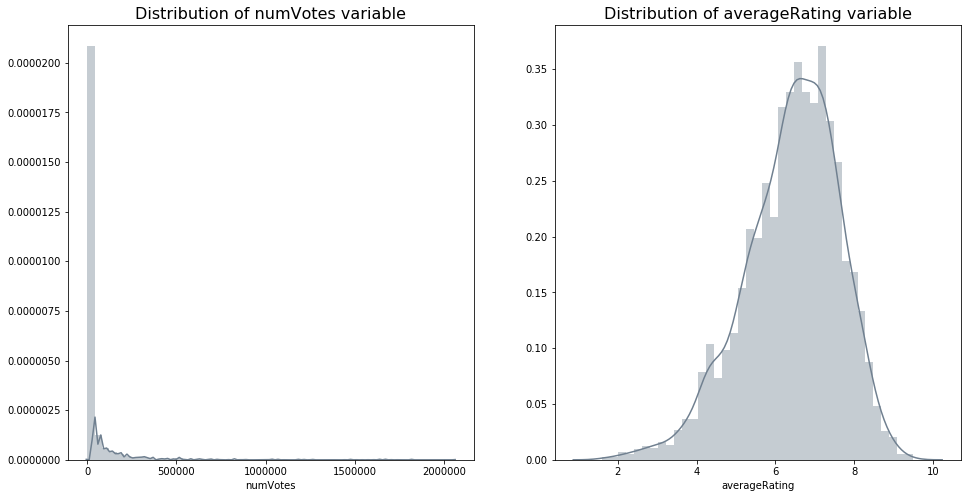

In [51]:
fig, ax =plt.subplots(1,2)
sns.distplot(df.numVotes, ax=ax[0], color='slategrey')
ax[0].set_title('Distribution of numVotes variable', fontsize='16')

sns.distplot(df.averageRating, ax=ax[1], color='slategrey')
ax[1].set_title('Distribution of averageRating variable', fontsize='16')
plt.show()

In [52]:
df[['numVotes', 'averageRating']].describe()

,numVotes,averageRating
count,3.658000e+03,3658.000000
mean,3.137069e+04,6.409240
std,1.112160e+05,1.203648
min,5.000000e+00,1.600000
25%,4.060000e+02,5.700000
50%,2.027000e+03,6.500000
75%,1.159200e+04,7.300000
max,2.055297e+06,9.500000


We can see that at least 75% of titles had less than 15.000 ratings and the avarage rating is round 6.5

The same distributions by type, disregarding outliers

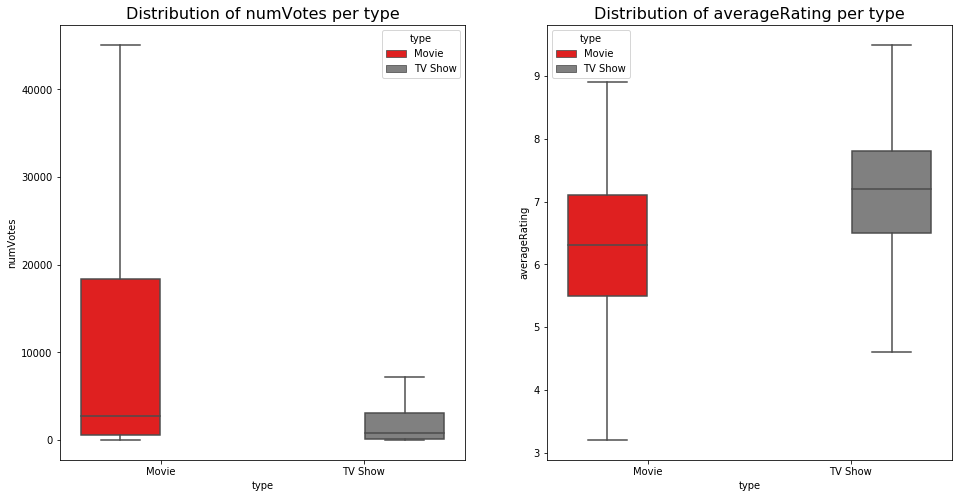

In [53]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x='type', y='numVotes', hue='type', palette=["red", "grey"], data=df, ax=ax[0], showfliers = False)
#ax[0].set_ylim([0, 10000]) 
ax[0].set_title('Distribution of numVotes per type', fontsize='16')
sns.boxplot(x='type', y='averageRating', hue='type', palette=["red", "grey"], data=df, ax=ax[1], showfliers = False)
ax[1].set_title('Distribution of averageRating per type', fontsize='16')
plt.show()

In [54]:
df_movie.describe()

,show_id,release_year,duration,numVotes,averageRating,year_added
count,2.821000e+03,2821.000000,2821.000000,2.821000e+03,2821.000000,2821.000000
mean,7.465375e+07,2011.992201,105.819568,3.894688e+04,6.209571,2018.065225
std,1.439357e+07,9.704642,23.155282,1.251668e+05,1.162786,1.165095
min,2.698800e+05,1944.000000,23.000000,6.000000e+00,1.600000,2009.000000
25%,7.026261e+07,2011.000000,91.000000,5.560000e+02,5.500000,2017.000000
50%,8.014222e+07,2016.000000,101.000000,2.770000e+03,6.300000,2018.000000
75%,8.023840e+07,2017.000000,119.000000,1.839300e+04,7.100000,2019.000000
max,8.123573e+07,2020.000000,312.000000,2.055297e+06,8.900000,2020.000000


In [55]:
df_tv.describe()

,show_id,release_year,duration,numVotes,averageRating,year_added
count,8.370000e+02,837.000000,837.000000,837.000000,837.000000,837.000000
mean,7.974877e+07,2016.043011,1.084827,5836.121864,7.082198,2018.040621
std,2.579301e+06,4.619033,0.502360,20331.420657,1.090293,1.126358
min,7.014244e+07,1972.000000,1.000000,5.000000,1.900000,2015.000000
25%,8.012834e+07,2015.000000,1.000000,146.000000,6.500000,2017.000000
50%,8.020215e+07,2018.000000,1.000000,805.000000,7.200000,2018.000000
75%,8.099306e+07,2019.000000,1.000000,3065.000000,7.800000,2019.000000
max,8.123560e+07,2020.000000,12.000000,292016.000000,9.500000,2020.000000


TV Shows had a lower number of ratings, but on average it were better rated than Movies

For the next analyzes, I will consider only movies and tv shows that had at least 2.000 and 500 ratings, respectively

In [56]:
df_movie = df.loc[ (df['numVotes']>=2000) & (df['type']=='Movie')].sort_values(by=['averageRating'], ascending=[False]).reset_index()
df_tv = df.loc[ (df['numVotes']>=800) & (df['type']=='TV Show')].sort_values(by=['averageRating'], ascending=[False]).reset_index()

In [57]:
print(df_movie.shape)
print(df_tv.shape)

(1556, 14)
(419, 14)


I will consider only the 100 best rated Movies and TV Shows

In [58]:
df_top100mv = df_movie[0:100]
df_top100tv = df_tv[0:100]

### Which countries have the greatest amount of top rated Movies and TV Shows?    

Some titles have more than one country, for this reason, we will split the country variable

In [59]:
from itertools import chain
import numpy as np

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

In [60]:
# concatenate movies and tv shows dataframes
df_top100 = pd.concat([df_top100mv, df_top100tv])

# calculate lengths of splits
lens =df_top100['country'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
df_top100_country = pd.DataFrame({'type': np.repeat(df_top100['type'], lens),
                                    'title': np.repeat(df_top100['title'], lens),
                                    'country': chainer(df_top100['country']),
                                   })
df_top100_country['country']=df_top100_country['country'].str.strip()

print(df_top100_country)

       type                                          title         country
0     Movie  The Lord of the Rings: The Return of the King     New Zealand
0     Movie  The Lord of the Rings: The Return of the King   United States
1     Movie                               Schindler's List   United States
2     Movie                                   Pulp Fiction   United States
3     Movie                                      Inception   United States
..      ...                                            ...             ...
95  TV Show                                     Reply 1997     South Korea
96  TV Show                                       Lovesick         Unknown
97  TV Show                          Sunderland 'Til I Die  United Kingdom
98  TV Show                          Something in the Rain     South Korea
99  TV Show                                           Dogs   United States

[264 rows x 3 columns]


In [61]:
# Separating dataframes
df_top100mv_country = df_top100_country.loc[df_top100_country['type']=='Movie']
df_top100tv_country  = df_top100_country.loc[df_top100_country['type']=='TV Show']

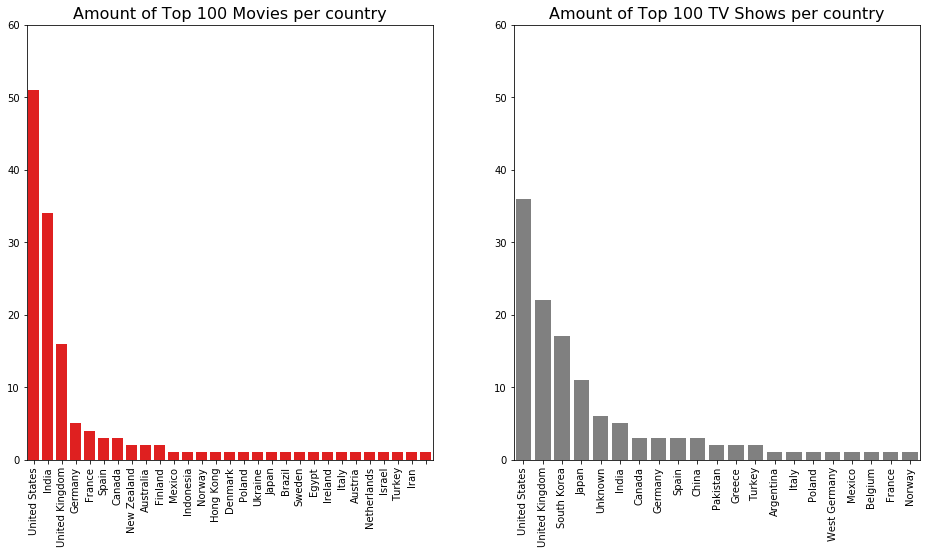

In [62]:
fig, ax =plt.subplots(1,2)

sns.countplot(x='country', color='red', data=df_top100mv_country, 
              order = df_top100mv_country['country'].value_counts().index, ax=ax[0])
ax[0].set_title('Amount of Top 100 Movies per country', fontsize='16')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim([0,60])
ax[0].set_xticklabels(labels=df_top100mv_country['country'].value_counts().index ,rotation=90, ha='center')

sns.countplot(x='country', color='grey', data=df_top100tv_country, 
              order = df_top100tv_country['country'].value_counts().index, ax=ax[1])
ax[1].set_title('Amount of Top 100 TV Shows per country', fontsize='16')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim([0,60])
ax[1].set_xticklabels(labels=df_top100tv_country['country'].value_counts().index ,rotation=90, ha='center')
plt.show()

### Which genres have the greatest amount of top rated Movies and TV Shows?    

Some titles have more than one genre, for this reason, we will split the genre variable

In [63]:
# calculate lengths of splits
lens =df_top100['listed_in'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
df_top100_genre = pd.DataFrame({'type': np.repeat(df_top100['type'], lens),
                                'title': np.repeat(df_top100['title'], lens),
                                'listed_in': chainer(df_top100['listed_in'])})
df_top100_genre['listed_in']=df_top100_genre['listed_in'].str.strip()

print(df_top100_genre)

       type                                          title  \
0     Movie  The Lord of the Rings: The Return of the King   
0     Movie  The Lord of the Rings: The Return of the King   
1     Movie                               Schindler's List   
1     Movie                               Schindler's List   
2     Movie                                   Pulp Fiction   
..      ...                                            ...   
97  TV Show                          Sunderland 'Til I Die   
98  TV Show                          Something in the Rain   
98  TV Show                          Something in the Rain   
98  TV Show                          Something in the Rain   
99  TV Show                                           Dogs   

                 listed_in  
0       Action & Adventure  
0         Sci-Fi & Fantasy  
1           Classic Movies  
1                   Dramas  
2           Classic Movies  
..                     ...  
97  International TV Shows  
98  International TV Sh

In [64]:
# Separating dataframes
df_top100mv_genre = df_top100_genre.loc[df_top100_genre['type']=='Movie']
df_top100tv_genre  = df_top100_genre.loc[df_top100_genre['type']=='TV Show']

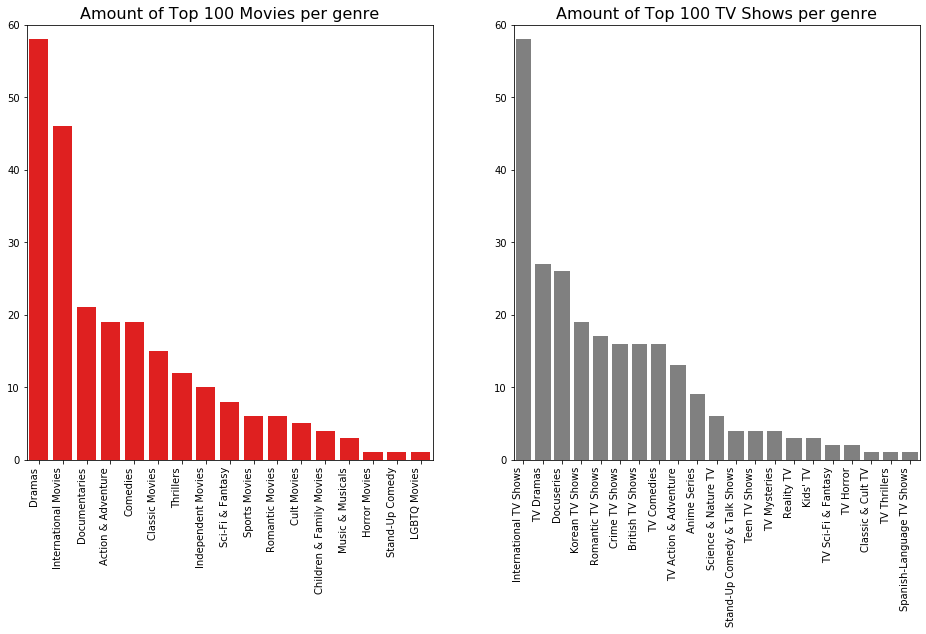

In [65]:
fig, ax =plt.subplots(1,2)

sns.countplot(x='listed_in', color='red', data=df_top100mv_genre, 
              order = df_top100mv_genre['listed_in'].value_counts().index, ax=ax[0])
ax[0].set_title('Amount of Top 100 Movies per genre', fontsize='16')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim([0,60])
ax[0].set_xticklabels(labels=df_top100mv_genre['listed_in'].value_counts().index ,rotation=90, ha='right')

sns.countplot(x='listed_in', color='grey', data=df_top100tv_genre, 
              order = df_top100tv_genre['listed_in'].value_counts().index, ax=ax[1])
ax[1].set_title('Amount of Top 100 TV Shows per genre', fontsize='16')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim([0,60])
ax[1].set_xticklabels(labels=df_top100tv_genre['listed_in'].value_counts().index ,rotation=90, ha='right')
plt.show()

### Top 10 most popular Movies

In [66]:
df_movie[['title', 'country','listed_in']][0:10]

,title,country,listed_in
0,The Lord of the Rings: The Return of the King,"New Zealand, United States","Action & Adventure, Sci-Fi & Fantasy"
1,Schindler's List,United States,"Classic Movies, Dramas"
2,Pulp Fiction,United States,"Classic Movies, Cult Movies, Dramas"
3,Inception,"United States, United Kingdom","Action & Adventure, Sci-Fi & Fantasy, Thrillers"
4,The Matrix,United States,"Action & Adventure, Sci-Fi & Fantasy"
5,The Lord of the Rings: The Two Towers,"New Zealand, United States","Action & Adventure, Sci-Fi & Fantasy"
6,City of God,"Brazil, France, Germany","Dramas, Independent Movies, International Movies"
7,Be Here Now,"United States, Australia",Documentaries
8,Senna,"United Kingdom, France, United States","Documentaries, International Movies, Sports Mo..."
9,American History X,United States,Dramas


### Top 3 most popular Movies per year of release

In [67]:
df_movie['rank'] = df_movie.groupby(['release_year'])['averageRating'].rank(ascending=False, method='first')

pv_movie = pd.pivot_table(df_movie.loc[df_movie['rank']<=3], index=['release_year','title'], values='averageRating')
pv_movie = pv_movie.sort_values(by=['release_year','averageRating'], ascending=False)
pd.set_option('display.max_rows', pv_movie.shape[0]+1)
print(pv_movie)

                                                             averageRating
release_year title                                                        
2020         A Fall from Grace                                         5.9
             Ghost Stories                                             4.3
2019         Super Deluxe                                              8.3
             Article 15                                                8.2
             Klaus                                                     8.2
2018         Avengers: Infinity War                                    8.4
             Qismat                                                    8.4
             Spider-Man: Into the Spider-Verse                         8.4
2017         Cuba and the Cameraman                                    8.3
             LA 92                                                     8.2
             Chasing Coral                                             8.1
2016         Dangal      

### Top 10 most popular TV Shows

In [68]:
df_tv[['title', 'country','listed_in']][0:10]

,title,country,listed_in
0,Planet Earth II,United Kingdom,"British TV Shows, Docuseries, Science & Nature TV"
1,Blue Planet II,United Kingdom,"British TV Shows, Docuseries, Science & Nature TV"
2,Our Planet,"United States, United Kingdom","Docuseries, Science & Nature TV"
3,The Hunt,United Kingdom,"British TV Shows, Docuseries, Science & Nature TV"
4,Reply 1988,Unknown,"International TV Shows, Korean TV Shows, Roman..."
5,Yeh Meri Family,India,"International TV Shows, TV Comedies"
6,Life,"United Kingdom, United States, Greece, Italy, ...","British TV Shows, Docuseries, International TV..."
7,Africa,United Kingdom,"British TV Shows, Docuseries, International TV..."
8,Frozen Planet,"United Kingdom, United States, Spain, Germany,...","British TV Shows, Docuseries, International TV..."
9,Life Story,United Kingdom,"British TV Shows, Docuseries, Science & Nature TV"


### Top 3 most popular TV Shows per year of release

In [69]:
df_tv['rank'] = df_tv.groupby(['release_year'])['averageRating'].rank(ascending=False, method='first')

pv_tv = pd.pivot_table(df_tv.loc[df_tv['rank']<=3], index=['release_year','title'], values='averageRating')
pv_tv = pv_tv.sort_values(by=['release_year','averageRating'], ascending=False)
pd.set_option('display.max_rows', pv_tv.shape[0]+1)
print(pv_tv)

                                                averageRating
release_year title                                           
2020         Kipo and the Age of Wonderbeasts             8.4
             Cheer                                        8.2
             Spinning Out                                 7.7
2019         Our Planet                                   9.3
             The Untamed                                  8.9
             When They See Us                             8.9
2018         Yeh Meri Family                              9.1
             College Romance                              8.9
             Mr. Sunshine                                 8.8
2017         Blue Planet II                               9.3
             Dave Chappelle                               8.7
             Stranger                                     8.6
2016         Planet Earth II                              9.5
             Signal                                       8.6
        

If you didn't know what to watch on Netflix, now you have enough options! :)